<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/Skenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/dataset_fixed(1).csv' 
dataframe = pd.read_csv(URL)
dataframe

,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
85,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
86,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
87,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


In [4]:
#mengambil kolom LAG0 sampai LAG12 dan OS dan mengacak dataset
data = dataframe[[ 'LAG0', 'LAG1', 'LAG2', 'LAG3', 'LAG4', 'LAG5', 'LAG6', 'LAG7', 'LAG8', 'LAG9', 'LAG10', 'LAG11', 'LAG12', 'OS' ]]
data = shuffle(data)
data.head()

,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
60,5,0,0,0,0,0,0,0,0,0,0,0,5,1
15,2,1,1,3,1,0,0,0,0,0,0,0,0,1
85,4,1,4,3,3,5,2,1,4,1,1,1,2,1
3,1,0,3,1,4,6,4,4,1,4,3,3,5,0
66,1,5,3,3,2,1,1,2,2,6,2,2,2,0


In [12]:
#train-test split 80-20
train, test = train_test_split(data, test_size=0.2)
print(len(train), 'banyak data train')
print(len(test), 'banyak data test')

#train-test split 70-30
train1, test1 = train_test_split(data, test_size=0.3)
print(len(train1), 'banyak data train')
print(len(test1), 'banyak data test')

71 banyak data train
18 banyak data test
62 banyak data train
27 banyak data test


In [6]:
#memisahkan label
def df_to_dataset(data, batch_size=32):
  data = data.copy()
  labels = data.pop('OS')
  ds = tf.data.Dataset.from_tensor_slices((dict(data), labels))
  ds = ds.batch(batch_size)
  return ds

In [13]:
batch_size = 10 #menggunakan df_to_dataset
train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, batch_size=batch_size)

train_ds1 = df_to_dataset(train1, batch_size=batch_size)
test_ds1 = df_to_dataset(test1, batch_size=batch_size)

In [8]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('LAG0:', feature_batch['LAG0'])
  print('LAG1:', feature_batch['LAG1'])
  print('OS:', label_batch)

Every feature: ['LAG0', 'LAG1', 'LAG2', 'LAG3', 'LAG4', 'LAG5', 'LAG6', 'LAG7', 'LAG8', 'LAG9', 'LAG10', 'LAG11', 'LAG12']
LAG0: tf.Tensor([0 0 1 1 1], shape=(5,), dtype=int64)
LAG1: tf.Tensor([0 3 0 2 1], shape=(5,), dtype=int64)
OS: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


In [9]:
feature_columns = []

for header in ['LAG0', 'LAG1', 'LAG2', 'LAG3', 'LAG4', 'LAG5', 'LAG6', 'LAG7', 'LAG8', 'LAG9', 'LAG10', 'LAG11', 'LAG12']:
  feature_columns.append(feature_column.numeric_column(header))

In [10]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_layer

In [21]:
model = tf.keras.Sequential([
  feature_layer,
  #layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#80-20
history = model.fit(train_ds,
          validation_data=test_ds,
          epochs=25)

Epoch 1/25
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/8 [==>...........................] - ETA: 3s - loss: 0.9454 - accuracy: 0.2000WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'LAG0': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'LAG1': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=int64>, 'LAG2': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int64>, 'LAG3': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int64>, 'LAG4': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int64>, 'LAG5': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int64>, 'LAG6': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int64>, 'LAG7': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=int64>, 'LAG8': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=int64>, 'LAG9': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int64>, 'LAG10': <

In [17]:
history2 = model.fit(train_ds1,
          validation_data=test_ds1,
          epochs=25)

Epoch 1/25
7/7 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 1.0000 - val_loss: 0.3682 - val_accuracy: 0.9630
Epoch 2/25
7/7 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 1.0000 - val_loss: 0.3767 - val_accuracy: 0.9630
Epoch 3/25
7/7 [==============================] - 0s 5ms/step - loss: 0.0643 - accuracy: 1.0000 - val_loss: 0.3830 - val_accuracy: 0.9630
Epoch 4/25
7/7 [==============================] - 0s 5ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 0.3862 - val_accuracy: 0.9630
Epoch 5/25
7/7 [==============================] - 0s 5ms/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 0.3880 - val_accuracy: 0.9630
Epoch 6/25
7/7 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.3896 - val_accuracy: 0.9630
Epoch 7/25
7/7 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 0.3921 - val_accuracy: 0.9630
Epoch 8/25
7/7 [==================

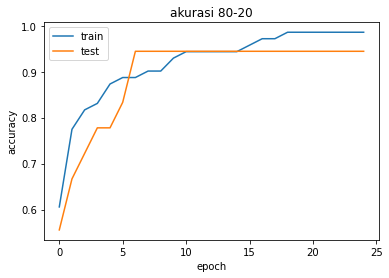

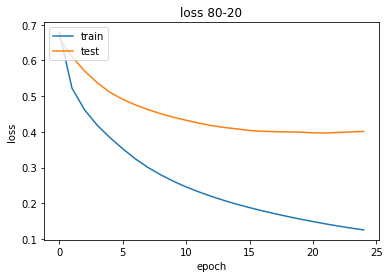

In [22]:
import matplotlib.pyplot as plt

#history 80-20
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi 80-20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss 80-20')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

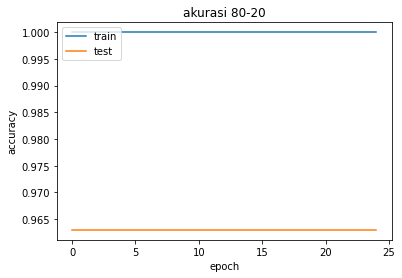

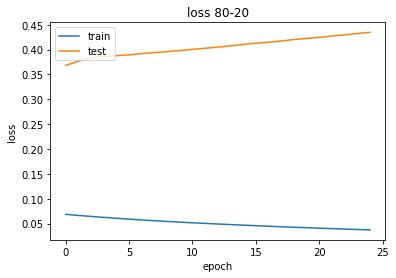

In [23]:
#history 70-30
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('akurasi 80-20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss 80-20')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()